In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pyfastx
import os
import h5py

In [2]:
def plot_side(arr, ylim=[-2, 2.5], xticks=[], yticks=[0, 2], pic_name=None):
    assert arr.shape[0] % 2 == 0, "arr must have even length."
    midpoint = int(arr.shape[0]/2)
    pl = arr[:midpoint]
    mn = arr[midpoint:]
    plt.bar(range(pl.shape[0]), pl, width=2, color="r",)
    plt.bar(range(mn.shape[0]), -mn, width=2, color="b")
    axes = plt.gca()
    axes.set_ylim(ylim)
    axes.set_yticks(yticks)
    axes.set_xticks(xticks)
    axes.spines[["right", "top", "bottom"]].set_visible(False)
    plt.xlim(-0.5, pl.shape[0]-.5)
    
    if pic_name is None:
        plt.show()
    else:
        plt.savefig(pic_name, transparent=True)
        plt.close()

In [3]:
server = "cbsu"
mnt = "/home2/ayh8/"
predict_dir = "predictions/ensemble/examples/"
data_dir = "data/gse110638/examples/"
fasta_fp = "concat_sequence.fna.gz"
procap_fp = "concat_procap.npz"
prediction_fps = [f"fold_{i}_examples_prediction.h5" for i in [4, 5, 6]]
workdir = "/Users/adamhe/github/scratch/examples"

In [4]:
os.makedirs(workdir, exist_ok=True)
print(f"scp {server}:{os.path.join(mnt, data_dir, fasta_fp)} {workdir}")
print(f"scp {server}:{os.path.join(mnt, data_dir, procap_fp)} {workdir}")
[print(f"scp {server}:{os.path.join(mnt, predict_dir, prediction_fp)} {workdir}") for prediction_fp in prediction_fps]

scp cbsu:/home2/ayh8/data/gse110638/examples/concat_sequence.fna.gz /Users/adamhe/github/scratch/examples
scp cbsu:/home2/ayh8/data/gse110638/examples/concat_procap.npz /Users/adamhe/github/scratch/examples
scp cbsu:/home2/ayh8/predictions/ensemble/examples/fold_4_examples_prediction.h5 /Users/adamhe/github/scratch/examples
scp cbsu:/home2/ayh8/predictions/ensemble/examples/fold_5_examples_prediction.h5 /Users/adamhe/github/scratch/examples
scp cbsu:/home2/ayh8/predictions/ensemble/examples/fold_6_examples_prediction.h5 /Users/adamhe/github/scratch/examples


[None, None, None]

In [39]:
fasta = pyfastx.Fasta(os.path.join(workdir, fasta_fp))
tracks = h5py.File(os.path.join(workdir, prediction_fps[2]))["track"]
quantity = h5py.File(os.path.join(workdir, prediction_fps[2]))["quantity"]
y = np.load(os.path.join(workdir, procap_fp))["arr_0"][:, np.r_[250:750, 1250:1750]]
seqs = pyfastx.Fasta(os.path.join(workdir, fasta_fp))
ids = [rec.name for rec in seqs]

In [40]:
y.shape

(3953, 1000)

In [41]:
y_norm = np.array(tracks) / (np.array(tracks).sum(axis=1, keepdims=True) + 1e-3)
y_pred_scaled = y_norm * quantity

In [42]:
NASP_prom_coord = "chr1:45583513-45584512" # fold4
EH38E3485200_enh_coord = "chr22:43187170-43188169" #fold5
rpl10a_prom_coord = "chr6:391301-392300" # fold6

NASP_prom_ids = [idx.split("_")[-1] == NASP_prom_coord for idx in ids]
EH38E3485200_enh_ids = [idx.split("_")[-1] == EH38E3485200_enh_coord for idx in ids]
rpl10a_prom_ids = [idx.split("_")[-1] == rpl10a_prom_coord for idx in ids]

In [43]:
np.array(tracks)[NASP_prom_ids, :]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

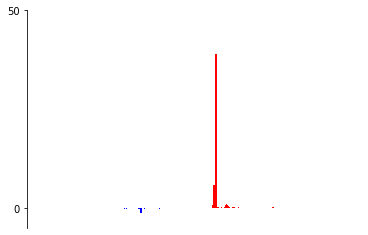

In [44]:
plot_side(np.mean(y[NASP_prom_ids], axis=0), ylim=[-5, 50], yticks=[0, 50])#, pic_name="fold4_nasp_prom_expt.pdf")

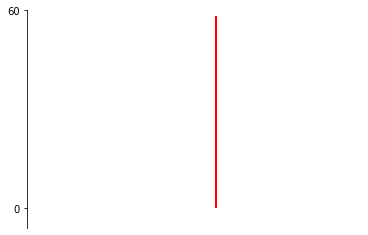

In [45]:
plot_side(np.nanmean(y_pred_scaled[NASP_prom_ids], axis=0), ylim=[-6, 60], yticks=[0, 60])#, pic_name="fold4_nasp_prom_pred.pdf")

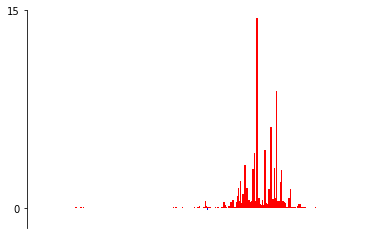

In [46]:
plot_side(np.mean(y[EH38E3485200_enh_ids], axis=0), ylim=[-1.5, 15], yticks=[0, 15])#, pic_name="ensemble_EH38E3485200_enh_expt.pdf")

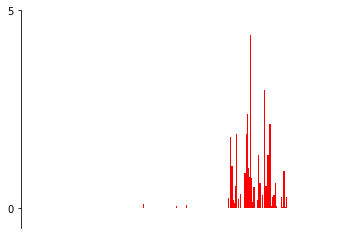

In [47]:
plot_side(np.mean(y_pred_scaled[EH38E3485200_enh_ids], axis=0), ylim=[-0.5, 5], yticks=[0, 5])#, pic_name="ensemble_EH38E3485200_enh_pred.pdf")

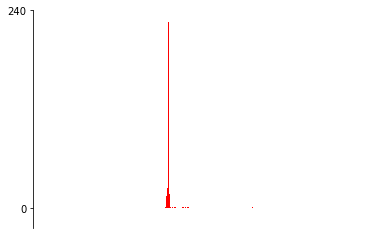

In [48]:
plot_side(np.mean(y[rpl10a_prom_ids], axis=0), ylim=[-24, 240], yticks=[0, 240])#, pic_name="ensemble_rpl10a_prom_expt.pdf")

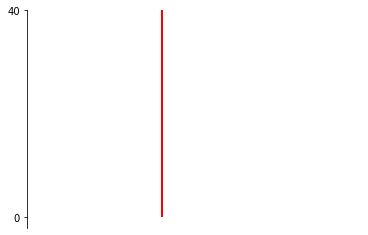

In [49]:
plot_side(np.mean(y_pred_scaled[rpl10a_prom_ids], axis=0), ylim=[-2, 40], yticks=[0, 40])#, pic_name="ensemble_rpl10a_prom_pred.pdf")

In [50]:
pearsonr(np.mean(y[rpl10a_prom_ids], axis=0), np.mean(y_pred_scaled[rpl10a_prom_ids], axis=0))

(0.9874411662848538, 0.0)